In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/track_features/tf_mini.csv')

In [5]:
# Function to generate histograms [Dropdown]
var_name = Dropdown(options=df.columns, value='beat_strength')

@interact(Variable = var_name)
def plotting(Variable):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[Variable])

interactive(children=(Dropdown(description='Variable', index=5, options=('track_id', 'duration', 'release_year…

In [6]:
track_features = pd.read_csv('data/track_features/tf_mini.csv', encoding= 'unicode_escape')
print('Number of unique songs: {}'.format(len(track_features)))

Number of unique songs: 50704


In [7]:
data = pd.read_csv('data/training_set/log_mini.csv')

In [8]:
set(data.track_id_clean).issubset(set(track_features.track_id))

True

In [9]:
data = data.rename(columns={'track_id_clean': 'track_id'})
df = data.merge(track_features, how='left', on='track_id')
df['mode'] = df['mode'].map({'major': 1, 'minor': 0})


In [10]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object

In [11]:
df.not_skipped.value_counts()

False    111996
True      55884
Name: not_skipped, dtype: int64

In [12]:
df.session_id.nunique()

10000

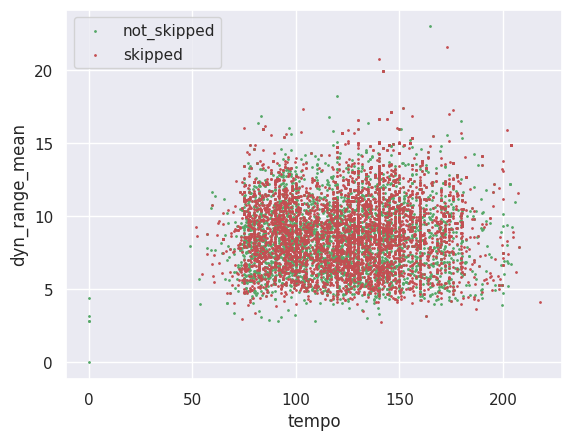

In [35]:
sample_df = df.groupby("not_skipped").sample(n=5000, random_state=1)
df1 = sample_df[sample_df['not_skipped'] == 1]
df2 = sample_df[sample_df['not_skipped'] == 0]

xaxis = 'tempo'
yaxis = 'dyn_range_mean'
ax = df1.plot(x=xaxis, y=yaxis, kind='scatter', c='g', label='not_skipped', s=1)
df2.plot(x=xaxis, y=yaxis, kind='scatter', ax=ax, c='r', label='skipped', s = 1)
plt.show()

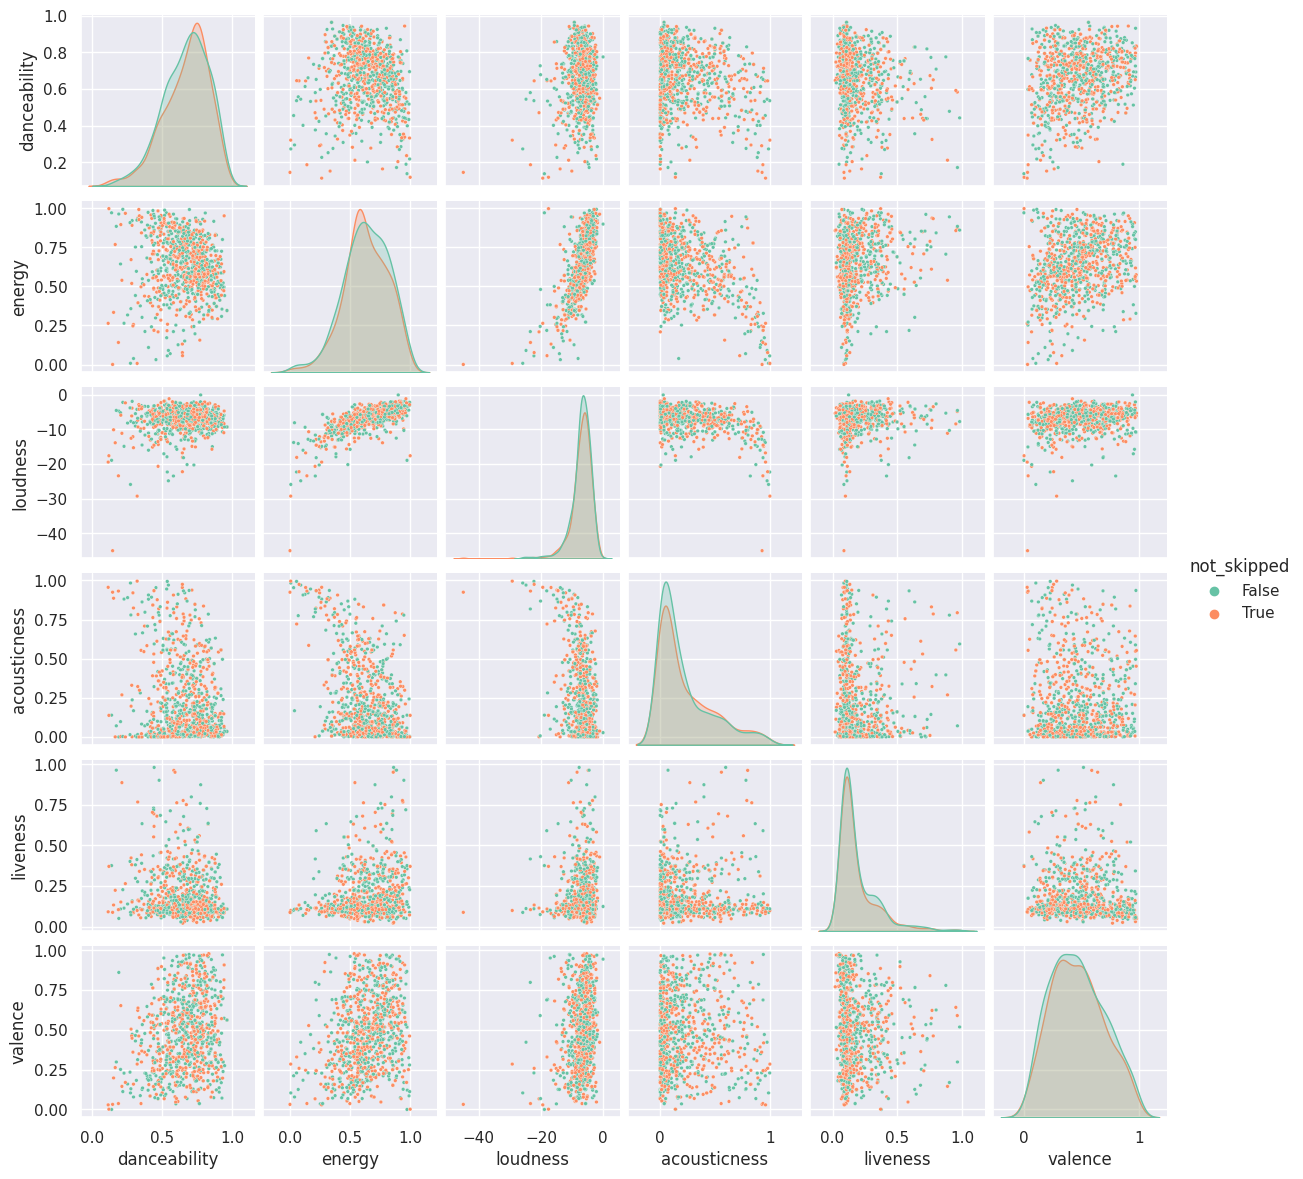

In [37]:
audio_features = ['danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'valence', 'not_skipped']
sub_data = df.groupby('not_skipped', group_keys=False).apply(lambda x: x.sample(5000))
sns.pairplot(data=sub_data.sample(frac=.1, replace=False, random_state=7)[audio_features], 
             hue='not_skipped', palette='Set2', height=2, plot_kws={"s":7});

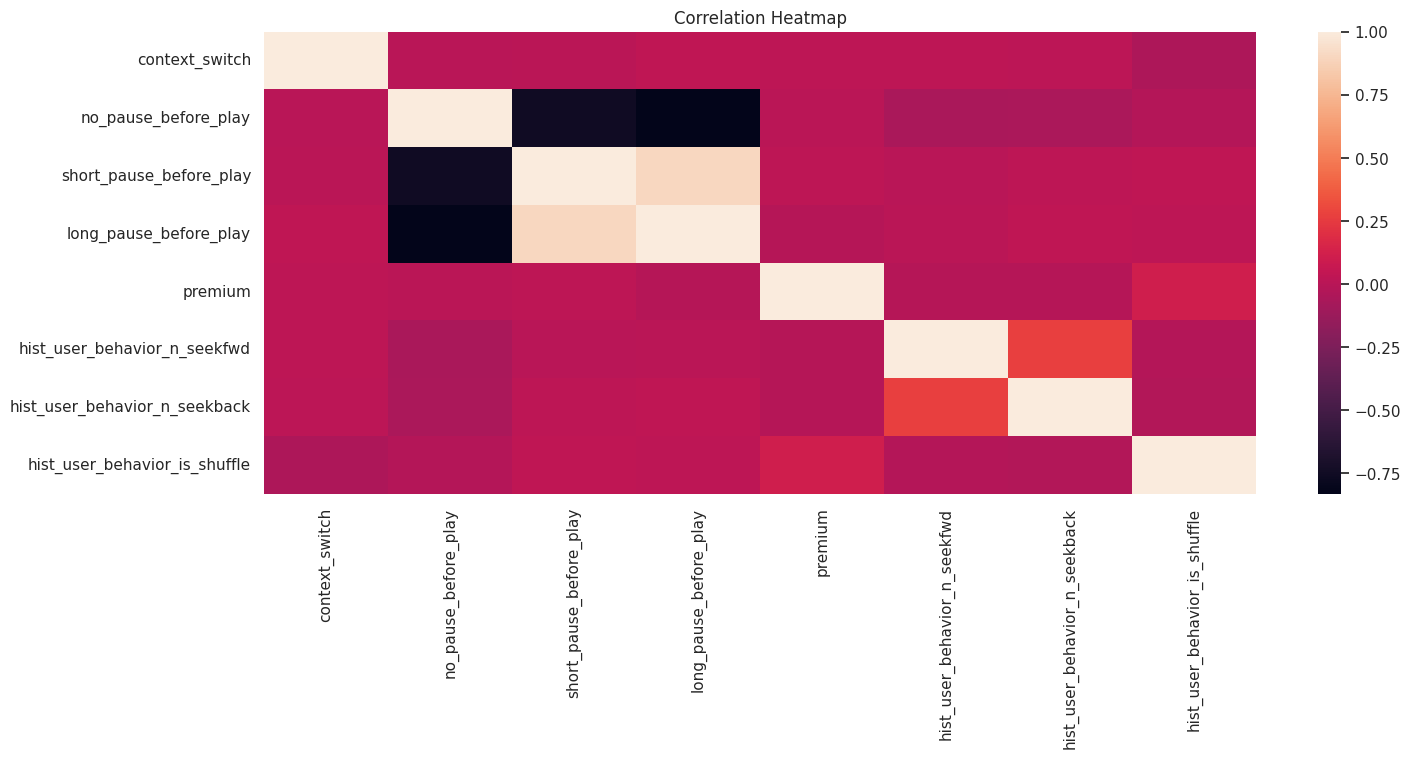

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[[
				'context_switch', 
                'no_pause_before_play', 
                'short_pause_before_play',
                'long_pause_before_play',
				'premium',
				'hist_user_behavior_n_seekfwd',
				'hist_user_behavior_n_seekback',
                'hist_user_behavior_is_shuffle',
				]].corr());
heatmap.set_title('Correlation Heatmap');

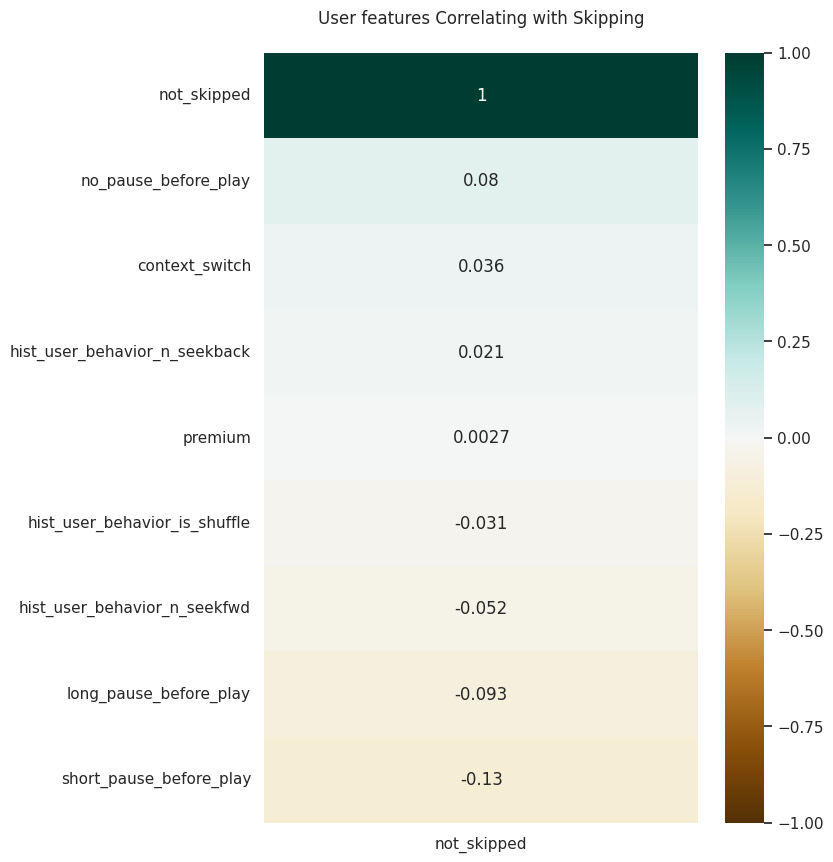

In [42]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(df[['not_skipped', 
                          'context_switch', 
                          'premium', 
                          'hist_user_behavior_is_shuffle',
						  'hist_user_behavior_n_seekfwd',
						  'hist_user_behavior_n_seekback',
                          'no_pause_before_play', 
                          'short_pause_before_play',
                          'long_pause_before_play']].corr()[['not_skipped']].sort_values(by='not_skipped', ascending=False),
						  					  vmin=-1, vmax=1, annot=True, cmap='BrBG' 
                      )
heatmap.set_title('User features Correlating with Skipping\n');

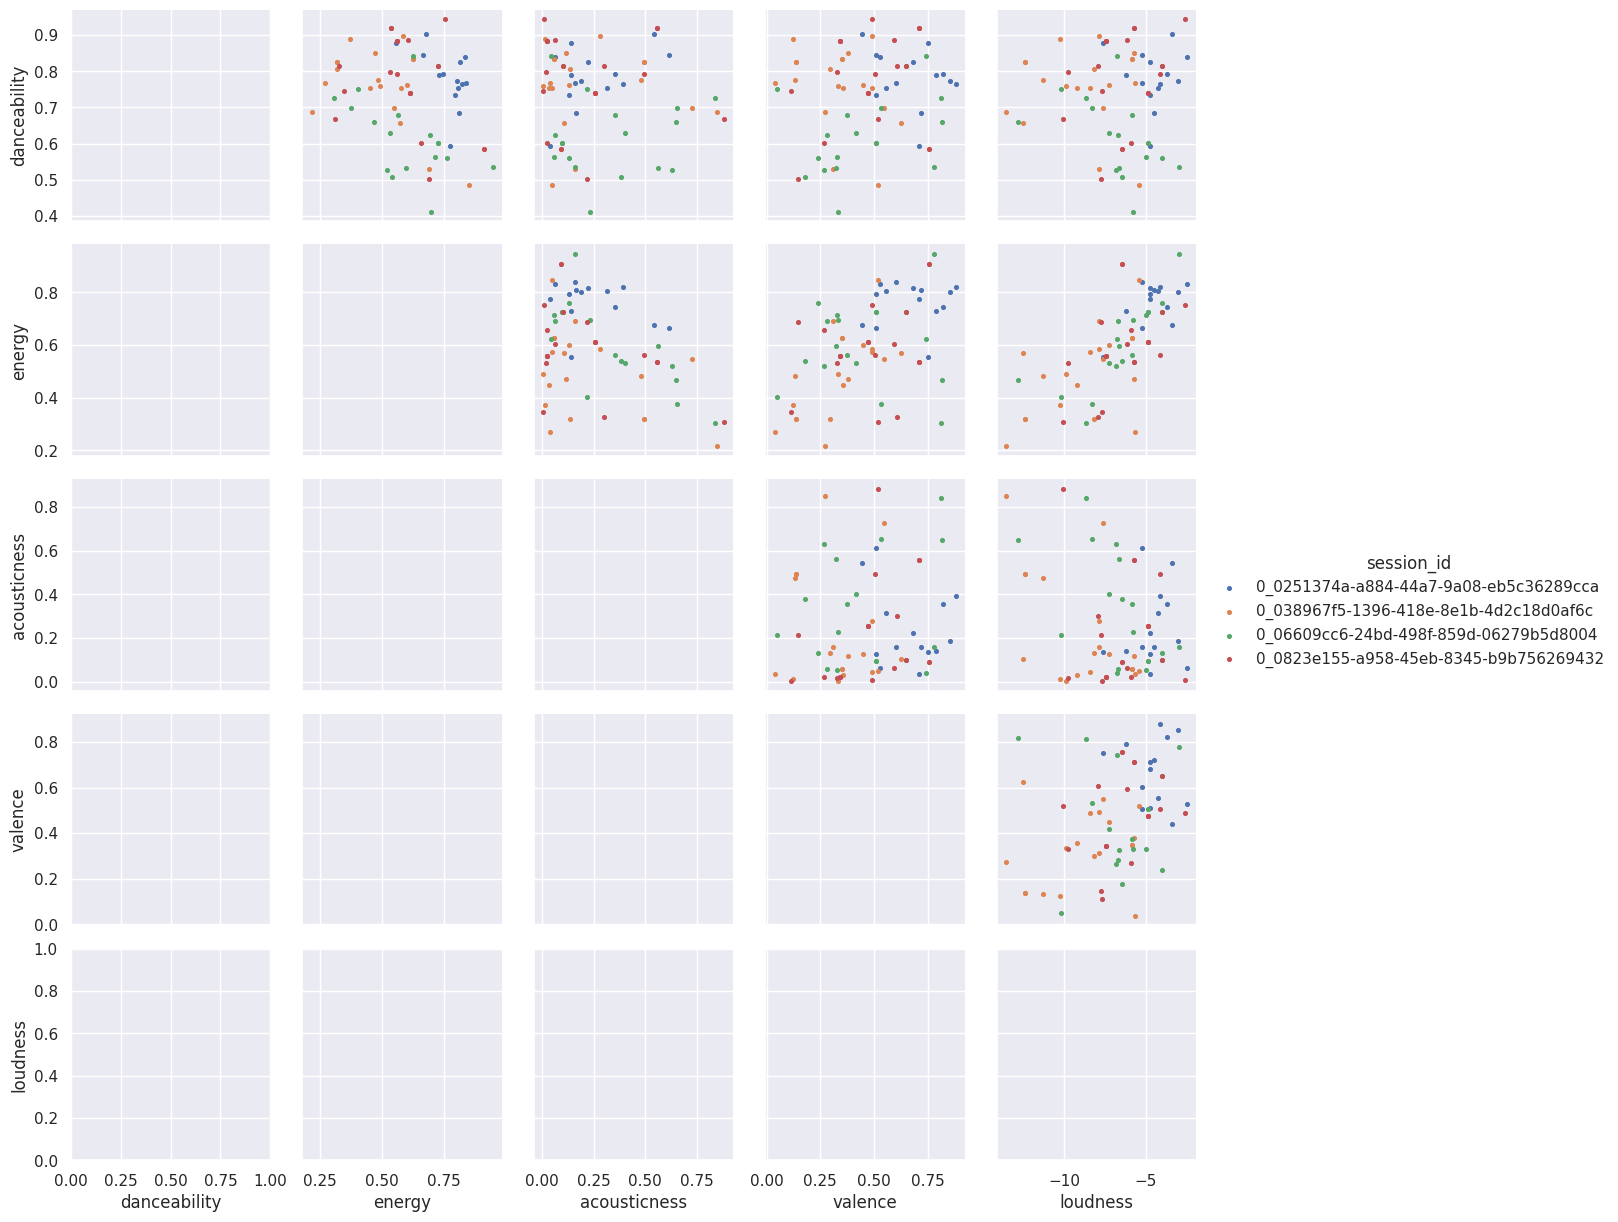

In [46]:
random_sessions = np.random.choice(df.session_id.unique(), 3)

features = ['danceability', 'energy', 'acousticness', 'valence', 'loudness', 'session_id']
g = sns.PairGrid(df[df.session_id.isin(random_sessions)][features], hue='session_id')
g.map_upper(plt.scatter, s=7)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=1)
g.add_legend();